In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pickle
from sklearn.manifold import TSNE
import pickle
import mpld3
import umap

In [3]:
lcvsKep_sampled_10perc, lcvsKep_sampled_100perc = np.load("../sparse_lcvs_v2.pickle", encoding="latin1",allow_pickle=True)


In [4]:
dense_data = lcvsKep_sampled_100perc
sparse_data = lcvsKep_sampled_10perc

In [76]:
dense_data.shape

(147036, 3)

In [30]:
import matplotlib.pyplot as plt
from tqdm import tqdm

def cutoff_value_return_outliers(embeddings):
    scores = []
    distribution = []
    for i, _ in enumerate(tqdm(embeddings)):
        curr_embedding = embeddings[i]
        true_embeddings = np.concatenate((embeddings[:i, :], embeddings[i+1:, :]), axis=0)
        distances = np.linalg.norm(true_embeddings - curr_embedding, axis=1)
        distribution.append(np.min(distances, axis=0))
    distribution = np.array(distribution)
    average = np.mean(distribution)
    std = np.std(distribution)
    normalized = np.apply_along_axis(lambda x: (x-average)/std, 0, distribution)

#     outliers = [i for i, _ in enumerate(normalized) if normalized[i] > cutoff]
    return scores, normalized, distribution

In [33]:

def cutoff_value_generate_folder(normalized, start=0, stop=4, num=50):
    print("IN GENERATE FOLDER")

#     scores, distribution, scores = cutoff_value_return_outliers(input_embeddings)
    
    # plot the number of outliers for the distribution as a function of cutoff
    
    num_outliers_lst = []
    cutoff_values = np.linspace(start, stop, num=num)
    for cutoff in tqdm(cutoff_values):
#         print(cutoff)
        cutoff_value_outliers = [i for i, _ in enumerate(normalized) if normalized[i] > cutoff]
        num_outliers = len(cutoff_value_outliers)
        num_outliers_lst.append(num_outliers)
        
    num_outliers_lst = np.array(num_outliers_lst)
        
    return cutoff_values, num_outliers_lst


In [41]:
# dense umap
umap_dense_embeddings = np.load("dmdt_dense_save/embeddings_umap_dense.npy")
umap_dense_scores, umap_dense_normalized, umap_dense_distribution = cutoff_value_return_outliers(umap_dense_embeddings)

100%|██████████| 147036/147036 [10:06<00:00, 242.49it/s]


In [94]:
umap_dense_cutoff_values, umap_dense_outliers_lst = cutoff_value_generate_folder(umap_dense_normalized, start=1, stop=6, num=50)

  0%|          | 0/50 [00:00<?, ?it/s]

IN GENERATE FOLDER


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


In [20]:
# dense tsne
tsne_dense_embeddings = np.load("dmdt_dense_save/embeddings_tsne_dense.npy")
tsne_dense_scores, tsne_dense_normalized, tsne_dense_distribution = cutoff_value_return_outliers(tsne_dense_embeddings)

100%|██████████| 147036/147036 [09:42<00:00, 252.57it/s]


In [96]:
tsne_dense_cutoff_values, tsne_dense_num_outliers_lst = cutoff_value_generate_folder(tsne_dense_normalized, start=1, stop=6, num=50)


  0%|          | 0/50 [00:00<?, ?it/s]

IN GENERATE FOLDER


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


In [22]:
# sparse tsne
tsne_sparse_embeddings = np.load("dmdt_sparse_save/embeddings_tsne_dense.npy")
tsne_sparse_scores, tsne_sparse_normalized, tsne_sparse_distribution = cutoff_value_return_outliers(tsne_sparse_embeddings)


100%|██████████| 147036/147036 [09:41<00:00, 252.89it/s]


In [97]:
tsne_sparse_cutoff_values, tsne_sparse_num_outliers_lst = cutoff_value_generate_folder(tsne_sparse_normalized, start=1, stop=6, num=50)



  0%|          | 0/50 [00:00<?, ?it/s]

IN GENERATE FOLDER


100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


In [24]:
# sparse umap
umap_sparse_embeddings = np.load("dmdt_sparse_save/embeddings_umap_dense.npy")
umap_sparse_scores, umap_sparse_normalized, umap_sparse_distribution = cutoff_value_return_outliers(umap_sparse_embeddings)


100%|██████████| 147036/147036 [10:03<00:00, 243.74it/s]


In [98]:
umap_sparse_cutoff_values, umap_sparse_num_outliers_lst = cutoff_value_generate_folder(umap_sparse_normalized, start=1, stop=6, num=50)



  0%|          | 0/50 [00:00<?, ?it/s]

IN GENERATE FOLDER


100%|██████████| 50/50 [00:35<00:00,  1.41it/s]


In [26]:
# concatenated dense
umap_dense_embeddings = np.load("dmdt_dense_save/embeddings_umap_dense.npy")
tsne_dense_embeddings = np.load("dmdt_dense_save/embeddings_tsne_dense.npy")

concat_embeddings = np.concatenate((umap_dense_embeddings, tsne_dense_embeddings), axis=1)
concat_dense_scores, concat_dense_normalized, concat_dense_distribution = cutoff_value_return_outliers(concat_embeddings)




100%|██████████| 147036/147036 [11:34<00:00, 211.61it/s]


In [99]:
concat_dense_cutoff_values, concat_dense_num_outliers_lst = cutoff_value_generate_folder(concat_dense_normalized, start=1, stop=6, num=50)




  0%|          | 0/50 [00:00<?, ?it/s]

IN GENERATE FOLDER


100%|██████████| 50/50 [00:35<00:00,  1.42it/s]


In [28]:
# concatenated dense
umap_sparse_embeddings = np.load("dmdt_sparse_save/embeddings_umap_dense.npy")
tsne_sparse_embeddings = np.load("dmdt_sparse_save/embeddings_tsne_dense.npy")

concat_embeddings_sparse = np.concatenate((umap_sparse_embeddings, tsne_sparse_embeddings), axis=1)
concat_sparse_scores, concat_sparse_normalized, concat_sparse_distribution = cutoff_value_return_outliers(concat_embeddings_sparse)




100%|██████████| 147036/147036 [11:24<00:00, 214.69it/s]


In [100]:
concat_sparse_cutoff_values, concat_sparse_num_outliers_lst = cutoff_value_generate_folder(concat_sparse_normalized, start=1, stop=6, num=50)



  0%|          | 0/50 [00:00<?, ?it/s]

IN GENERATE FOLDER


100%|██████████| 50/50 [00:34<00:00,  1.44it/s]


In [101]:
def calculate_kink(cutoff_values, num_outliers, method_name):
    
    # first plot the normal values
    plt.plot(cutoff_values, num_outliers)
    plt.title("Num outliers vs cutoff values " + str(method_name))
    plt.show()
    
    
    first_diff_y = np.diff(num_outliers)
    first_diff_x = cutoff_values[: -1]
    
    plt.plot(first_diff_x, first_diff_y)
    plt.title("d/d(cutoff) " + str(method_name))
    plt.show()
    
    second_diff_y = np.diff(first_diff_y)
    second_diff_x = first_diff_x[: -1]
    
    plt.plot(second_diff_x, second_diff_y)
    plt.title("d^2/d(cutoff)^2 " + str(method_name))
    plt.show()
    

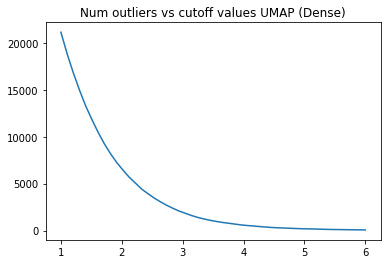

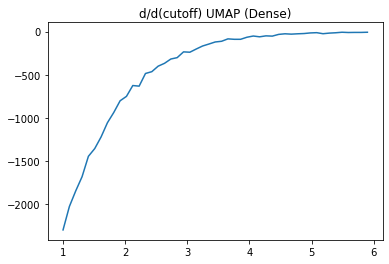

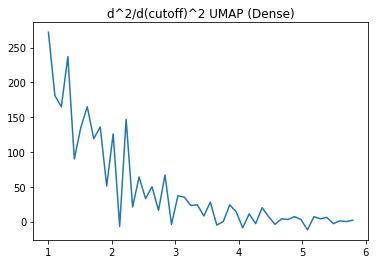

In [108]:
calculate_kink(umap_dense_cutoff_values, umap_dense_outliers_lst, "UMAP (Dense)")

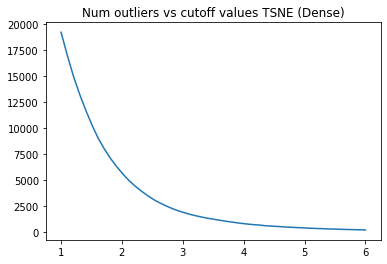

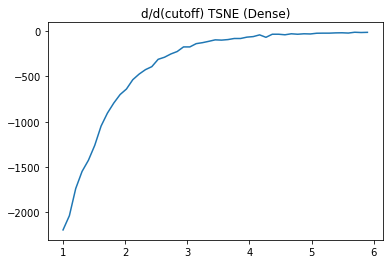

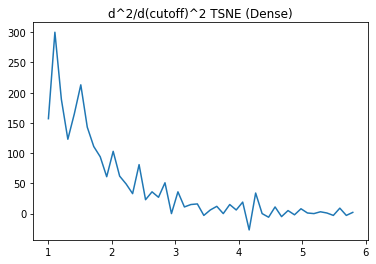

In [109]:
calculate_kink(tsne_dense_cutoff_values, tsne_dense_num_outliers_lst, "TSNE (Dense)")

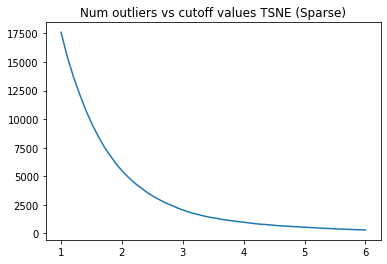

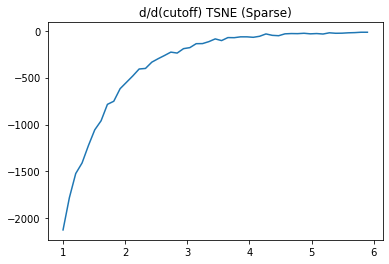

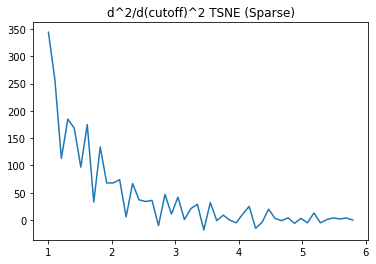

In [110]:
calculate_kink(tsne_sparse_cutoff_values, tsne_sparse_num_outliers_lst, "TSNE (Sparse)")

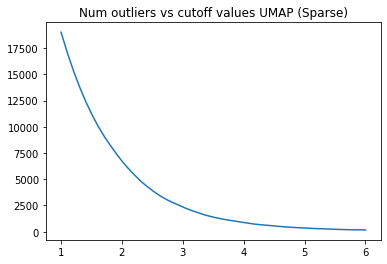

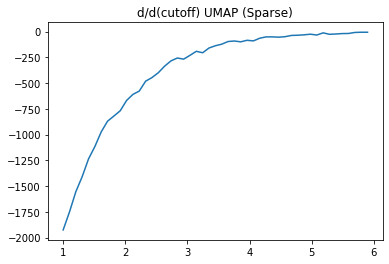

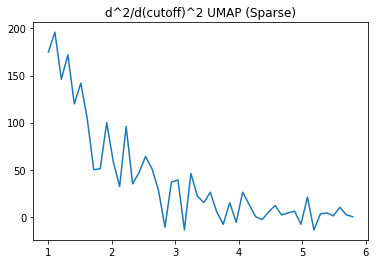

In [111]:
calculate_kink(umap_sparse_cutoff_values, umap_sparse_num_outliers_lst, "UMAP (Sparse)")

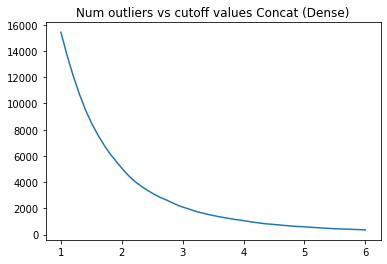

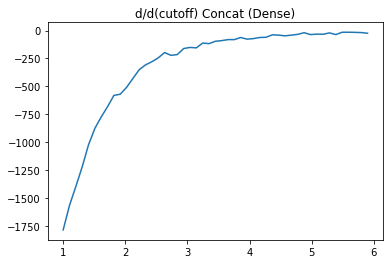

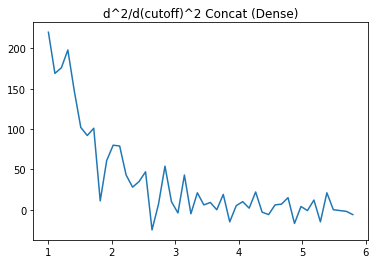

In [112]:
calculate_kink(concat_dense_cutoff_values, concat_dense_num_outliers_lst, "Concat (Dense)")

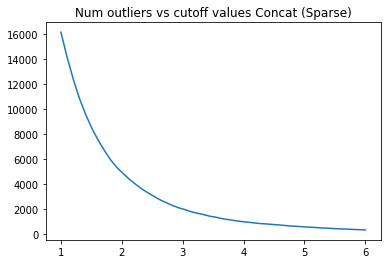

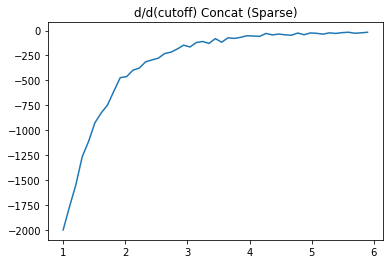

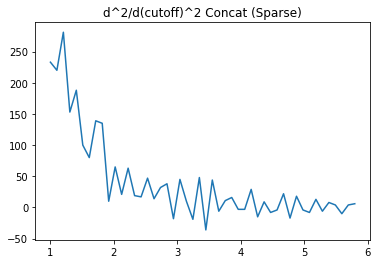

In [113]:
calculate_kink(concat_sparse_cutoff_values, concat_sparse_num_outliers_lst, "Concat (Sparse)")